In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [1]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=379b4cca8709cf0d581f27d8aca5e27c1172de5d1ce78f93740a83f7ac892b23
  Stored in directory: /home/snucse/.cache/pip/wheels/31/d0/2c/87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [2]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pytesseract from https://files.pythonhosted.org/packages/c5/54/ec007336f38d2d4ce61f3544af3e6855dacbf04a1ac8294f10cabe81146f/pytesseract-0.3.10-py3-none-any.whl.metadata
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
image=cv2.imread(r"C:\Users\SNUC\Downloads\image1004.jpg")


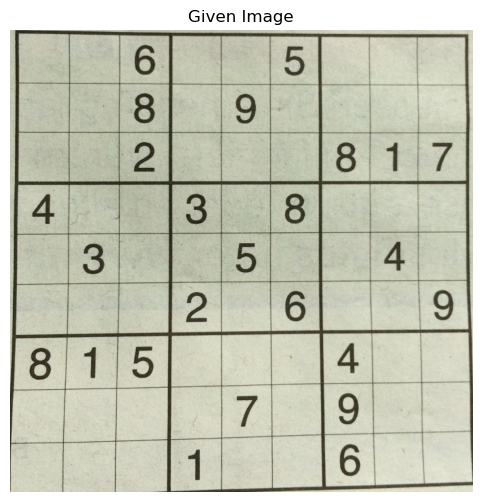

In [4]:
plt.figure(figsize=(6, 6))
plt.title('Given Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [7]:
binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

In [8]:
def find_largest_contour(image):
    """
    This function finds and returns the largest contour based on area in the image.
    """
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

def get_sudoku_bounds(contour):
    """
    This function takes the largest contour and returns the coordinates
    of the bounding box around it.
    """
    perimeter = cv2.arcLength(contour, True)
    corners = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    return corners

def order_points(pts):
    """
    This function orders the points in clockwise order starting from the top-left point.
    """
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    """
    This function performs a perspective transform based on the four points of the Sudoku grid.
    """
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

largest_contour = find_largest_contour(binary)

sudoku_corners = get_sudoku_bounds(largest_contour).reshape(4, 2)

warped = four_point_transform(image, sudoku_corners)

rotated = cv2.rotate(warped, cv2.ROTATE_90_CLOCKWISE)
rotated = cv2.rotate(rotated, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(6, 6))
plt.title('Cropped and Rotated Sudoku')
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

output_file_path = 'processed_sudoku.jpg'
cv2.imwrite(output_file_path, rotated)

output_file_path


ValueError: cannot reshape array of size 14 into shape (4,2)

In [8]:
new_sudoku_path = 'processed_sudoku.jpg'
new_sudoku_image = cv2.imread(new_sudoku_path)

(-0.5, 812.5, 827.5, -0.5)

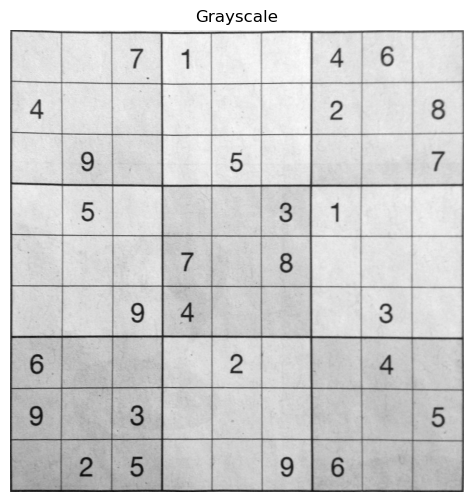

In [9]:
gray_new = cv2.cvtColor(new_sudoku_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.title('Grayscale')
plt.imshow(gray_new, cmap='gray')
plt.axis('off')


(-0.5, 812.5, 827.5, -0.5)

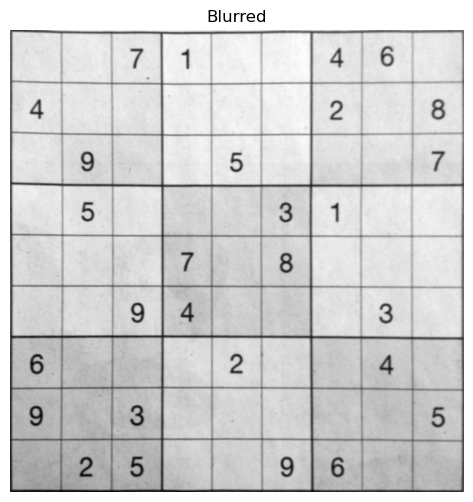

In [10]:
blur_new = cv2.GaussianBlur(gray_new, (5, 5), 0)
plt.figure(figsize=(6, 6))
plt.title('Blurred')
plt.imshow(blur_new, cmap='gray')
plt.axis('off')

(-0.5, 812.5, 827.5, -0.5)

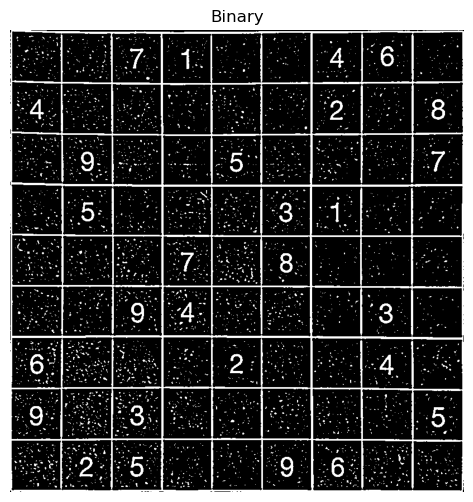

In [11]:
binary_new = cv2.adaptiveThreshold(blur_new, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.figure(figsize=(6, 6))
plt.title('Binary')
plt.imshow(binary_new, cmap='gray')
plt.axis('off')

(-0.5, 812.5, 827.5, -0.5)

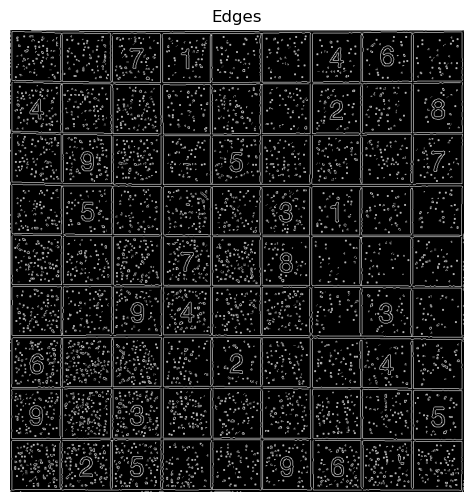

In [12]:
edges_new = cv2.Canny(binary_new, 50, 150, apertureSize=3)

plt.figure(figsize=(6, 6))
plt.title('Edges')
plt.imshow(edges_new, cmap='gray')
plt.axis('off')


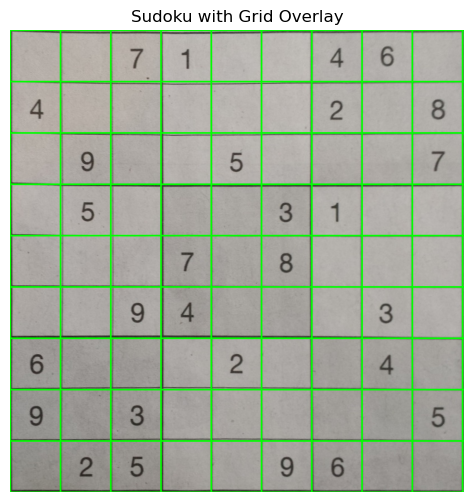

In [13]:
height, width = gray_new.shape

num_boxes = 9

box_width = width // num_boxes
box_height = height // num_boxes

grid_overlay = np.copy(new_sudoku_image)

grid_color = (0, 255, 0)  
for i in range(num_boxes + 1):
    start_horiz = (0, i * box_height)
    end_horiz = (width, i * box_height)
    cv2.line(grid_overlay, start_horiz, end_horiz, grid_color, 2)

    start_vert = (i * box_width, 0)
    end_vert = (i * box_width, height)
    cv2.line(grid_overlay, start_vert, end_vert, grid_color, 2)

plt.figure(figsize=(6, 6))
plt.title('Sudoku with Grid Overlay')
plt.imshow(cv2.cvtColor(grid_overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [14]:

import imutils
import numpy as np
import cv2
from PIL import Image
import pytesseract
import math
from skimage.filters import threshold_local

def order_points(pts):
    """initialzie a list of coordinates that will be ordered
    such that the first entry in the list is the top-left,
    the second entry is the top-right, the third is the
    bottom-right, and the fourth is the bottom-left"""

    rect = np.zeros((4, 2), dtype = "float32")
 
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
 
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
 
    return rect


def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
 
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
 
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
 
    
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
 
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
    return warped


def show_image(img,title):
    cv2.imshow(title, img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()  


def find_largest_feature(inp_img, scan_tl=None, scan_br=None):
    """
    Uses the fact the `floodFill` function returns a bounding box of the area it filled to find the biggest
    connected pixel structure in the image. Fills this structure in white, reducing the rest to black.
    """
    img = inp_img.copy() 
    height, width = img.shape[:2]

    max_area = 0
    seed_point = (None, None)

    if scan_tl is None:
        scan_tl = [0, 0]

    if scan_br is None:
        scan_br = [width, height]

    for x in range(scan_tl[0], scan_br[0]):
        for y in range(scan_tl[1], scan_br[1]):
            if img.item(y, x) == 255 and x < width and y < height:  
                area = cv2.floodFill(img, None, (x, y), 64)
                if area[0] > max_area:  
                    max_area = area[0]
                    seed_point = (x, y)

    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 255 and x < width and y < height:
                cv2.floodFill(img, None, (x, y), 64)

    mask = np.zeros((height + 2, width + 2), np.uint8)  

    if all([p is not None for p in seed_point]):
        cv2.floodFill(img, mask, seed_point, 255)

    

    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 64:  
                cv2.floodFill(img, mask, (x, y), 0)
    
    return img

def preprocess(image,case):
    ratio = image.shape[0] / 500.0
    orig = image.copy()
    image = imutils.resize(image, height = 500)

    if case == True:
    
        gray = cv2.GaussianBlur(image,(5,5),0)
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        mask = np.zeros((gray.shape),np.uint8)
        kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

        close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
        div = np.float32(gray)/(close)
        res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
        res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
        edged = cv2.Canny(res, 75, 200)
    
        cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if imutils.is_cv2() else cnts[1]
        cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
        for c in cnts:
          
            rect = cv2.boundingRect(c)
            area = cv2.contourArea(c)

            cv2.rectangle(edged.copy(), (rect[0],rect[1]), (rect[2]+rect[0],rect[3]+rect[1]), (0,0,0), 2)
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
            if len(approx) == 4:
                screenCnt = approx
                
                break
         
        cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
    
        warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
        warped1 = cv2.resize(warped,(610,610))
        warp = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY) 
        T = threshold_local(warp, 11, offset = 10, method = "gaussian")
        warp = (warp > T).astype("uint8") * 255
        th3 = cv2.adaptiveThreshold(warp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2) 
        kernel = np.ones((5,5),np.uint8)
        dilation =cv2.GaussianBlur(th3,(5,5),0)

    else :
        
        warped = image
        warped1 = cv2.resize(warped,(610,610))
        warp = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY) 
        T = threshold_local(warp, 11, offset = 10, method = "gaussian")
        warp = (warp > T).astype("uint8") * 255
        th3 = cv2.adaptiveThreshold(warp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)



    return th3,warped1,warped

def grids(img,warped2):
   
    img2 = img.copy()
    img = np.zeros((500,500,3), np.uint8)

    ratio2 = 3
    kernel_size = 3
    lowThreshold = 30

    frame = img

    img = cv2.resize(frame,(610,610))

    for i in range(10):
        cv2.line(img, (0,(img.shape[0]//9)*i),(img.shape[1],(img.shape[0]//9)*i), (255, 255, 255), 3, 1)
        cv2.line(warped2, (0,(img.shape[0]//9)*i),(img.shape[1],(img.shape[0]//9)*i), (125, 0, 55), 3, 1)
    
    for j in range(10):
        cv2.line(img, ((img.shape[1]//9)*j, 0), ((img.shape[1]//9)*j, img.shape[0]), (255, 255, 255), 3, 1)
        cv2.line(warped2, ((img.shape[1]//9)*j, 0), ((img.shape[1]//9)*j, img.shape[0]), (125, 0, 55), 3, 1)
  
   
    return img


def grid_points(img,warped2):
    img1 = img.copy()
    kernelx = cv2.getStructuringElement(cv2.MORPH_RECT,(2,10))

    dx = cv2.Sobel(img,cv2.CV_16S,1,0)
    dx = cv2.convertScaleAbs(dx)
    c=cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
    c = cv2.morphologyEx(c,cv2.MORPH_DILATE,kernelx,iterations = 1)
    cy = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)
    closex = cv2.morphologyEx(cy,cv2.MORPH_DILATE,kernelx,iterations = 1)

    kernely = cv2.getStructuringElement(cv2.MORPH_RECT,(10,2))
    dy = cv2.Sobel(img,cv2.CV_16S,0,2)
    dy = cv2.convertScaleAbs(dy)
    c = cv2.normalize(dy,dy,0,255,cv2.NORM_MINMAX)
    c = cv2.morphologyEx(c,cv2.MORPH_DILATE,kernely,iterations = 1)
    cy = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)
    closey = cv2.morphologyEx(cy,cv2.MORPH_DILATE,kernelx,iterations = 1)

    res = cv2.bitwise_and(closex,closey)
  
    ret, thresh = cv2.threshold(res,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    kernel = np.ones((6,6),np.uint8)


    se = np.ones((8,8), dtype='uint8')
    image_close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, se)
    image_close = cv2.morphologyEx(image_close, cv2.MORPH_OPEN, kernel)

    contour, hier = cv2.findContours        (image_close,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contour, key=cv2.contourArea, reverse=True)[:100]
    centroids = []
    for cnt in cnts:
    
        mom = cv2.moments(cnt)
        (x,y) = int(mom['m10']/mom['m00']), int(mom['m01']/mom['m00'])
        cv2.circle(img1,(x,y),4,(0,255,0),-1)
        cv2.circle(warped2,(x,y),4,(0,255,0),-1)
        centroids.append((x,y))



    Points = np.array(centroids,dtype = np.float32)
    c = Points.reshape((100,2))
    c2 = c[np.argsort(c[:,1])]

    b = np.vstack([c2[i*10:(i+1)*10][np.argsort(c2[i*10:(i+1)*10,0])] for i in range(10)])
    bm = b.reshape((10,10,2))

    return c2,bm,cnts

def image_to_num(c2):     
    img = 255-c2
    text = pytesseract.image_to_string(img, lang="eng",config='--psm 6 --oem 3') #builder=builder)
    return list(text)[0]

def get_digit(c2,bm,warped1,cnts):
    num = []
    centroidx = np.empty((9, 9))
    centroidy = np.empty((9, 9))
    global list_images
    list_images = []
    for i in range(0,9):
        for j in range(0,9):

            x1,y1 = bm[i][j] 
            x2,y2 = bm[i+1][j+1]
            
            coordx = ((x1+x2)//2)
            coordy = ((y1+y2)//2)
            centroidx[i][j] = coordx
            centroidy[i][j] = coordy
            crop = warped1[int(x1):int(x2),int(y1):int(y2)]
            crop = imutils.resize(crop, height=69,width=67)
            c2 = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            c2 = cv2.adaptiveThreshold(c2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY_INV,11,2)
            kernel = np.ones((2,2),np.uint8)
            c2= cv2.copyMakeBorder(c2,5,5,5,5,cv2.BORDER_CONSTANT,value=(0,0,0))
            no = 0
            shape=c2.shape
            w=shape[1]
            h=shape[0]
            mom = cv2.moments(c2)
            (x,y) = int(mom['m10']/mom['m00']), int(mom['m01']/mom['m00']) 
            c2 = c2[14:70,15:62]
            contour, hier = cv2.findContours (c2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
            if cnts is not None:
                cnts = sorted(contour, key=cv2.contourArea,reverse=True)[:1]

            for cnt in cnts:
                x,y,w,h = cv2.boundingRect(cnt)
                aspect_ratio = w/h
                area = cv2.contourArea(cnt)
                if area>120 and cnt.shape[0]>15 and aspect_ratio>0.2 and aspect_ratio<=0.9 : 
                    c2 = find_largest_feature(c2)
                    contour, hier = cv2.findContours (c2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
                    cnts = sorted(contour, key=cv2.contourArea,reverse=True)[:1]
                    for cnt in cnts:
                        rect = cv2.boundingRect(cnt)
                        c2 = c2[rect[1]:rect[3]+rect[1],rect[0]:rect[2]+rect[0]]
                        c2= cv2.copyMakeBorder(c2,5,5,5,5,cv2.BORDER_CONSTANT,value=(0,0,0))
                        list_images.append(c2)
                    no = image_to_num(c2)
            num.append(no)
    centroidx = np.transpose(centroidx)
    centroidy = np.transpose(centroidy)
    return c2, num, centroidx, centroidy




